In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('H:\\AiQuest\\Ai& ML\\practice\\class 4\\Height-Weight Data.csv')

In [3]:
df.head()  #It will show first 5 data from the dataset

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.tail()    #It will show last 5 data from the dataset

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
df.shape    # number of row and colum 

(3501, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


# Plotting all data from the dataset

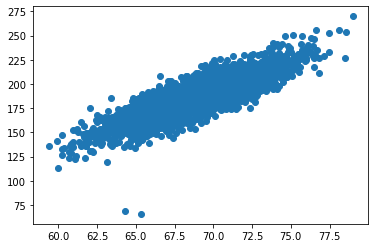

In [7]:
plt.scatter(df['Height'], df['Weight']) 

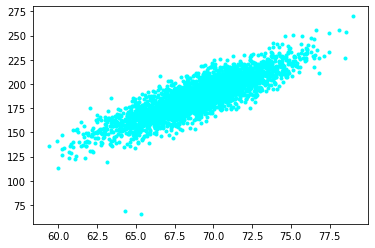

In [8]:
plt.scatter(df['Height'], df['Weight'], color='#00FFFF', marker='.') 

Text(0.5, 1.0, 'Height vs Weight')

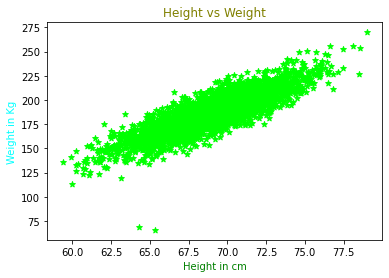

In [9]:
plt.scatter(df['Height'],df['Weight'],color= '#00FF00',marker='*')
plt.xlabel('Height in cm', color='green')
plt.ylabel('Weight in Kg', color='#00FFFF')
plt.title('Height vs Weight', color='#808000')

In [10]:
df.Height.mean()     # mean function to find out the mean value of Height from given dataset

69.02441087268797

In [11]:
df.Weight.mean()      # mean function to find out the mean value of Weight from given dataset

186.89125797946284

# Seperate independent and dependent variable

In [12]:
x= df[['Height']]

In [13]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [14]:
y= df[['Weight']]

In [15]:
y

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
3496,185.649086
3497,210.198845
3498,202.429960
3499,144.277671


# Training the model

In [16]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.30,random_state=2)
reg.fit(xtrain,ytrain)

LinearRegression()

In [17]:
xtrain.head()

,Height
3027,68.362858
176,67.599424
1004,68.238745
2085,70.827383
1741,71.693881


In [18]:
xtest.head()

,Height
122,66.949342
188,65.755499
1965,69.984405
523,64.300174
2364,69.742642


In [19]:
ytrain.head()

,Weight
3027,189.203924
176,177.766426
1004,193.983821
2085,197.925354
1741,196.726282


In [20]:
ytest.head()

,Weight
122,164.439146
188,179.855690
1965,192.144111
523,155.489729
2364,199.891271


# Predicting the value from the trained Linear Model

In [21]:
reg.predict([[68.362858]])

array([[182.95004893]])

In [22]:
reg.predict([[67.599424]])

array([[178.42512533]])

In [23]:
ypredict = reg.predict(xtest)
ypredict

array([[174.57204443],
       [167.49605828],
       [192.56106462],
       ...,
       [211.54868172],
       [203.97553281],
       [206.50842411]])

# Fiding model error

In [24]:
from  sklearn.metrics import  mean_squared_error
mse= mean_squared_error(ytest,ypredict)
mse

100.63503018033587

In [25]:
from  sklearn.metrics import  mean_absolute_error
mae= mean_absolute_error(ytest,ypredict)
mae

7.982131560280653

In [26]:
m=reg.coef_
m

array([[5.92706586]])

In [27]:
c=reg.intercept_
c

array([-222.24111281])

In [28]:
result = m*68.78190+c
result

array([[185.43373846]])

# Best fit line

In [29]:
ypredict = reg.predict(xtest)
ypredict

array([[174.57204443],
       [167.49605828],
       [192.56106462],
       ...,
       [211.54868172],
       [203.97553281],
       [206.50842411]])

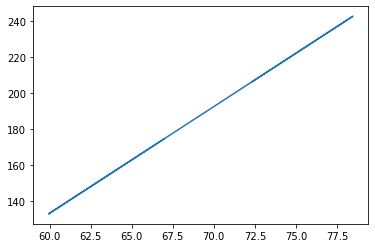

In [30]:
plt.plot(np.squeeze(xtest), ypredict)  # best fit line for xtest vs ytest

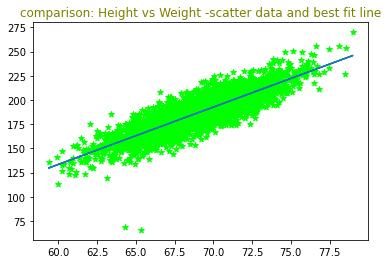

In [31]:
plt.title('comparison: Height vs Weight -scatter data and best fit line', color='#808000')
plt.scatter(df['Height'],df['Weight'],color= '#00FF00',marker='*')
plt.plot(df.Height , reg.predict(df[['Height']]))         # best fit line for Height vs Weight (whole dataset)


# Testing data from outside dataset

In [32]:
xtrain.to_csv('x2.csv')
x2 = pd.read_csv('x2.csv')
x2

,Unnamed: 0,Height
0,3027,68.362858
1,176,67.599424
2,1004,68.238745
3,2085,70.827383
4,1741,71.693881
...,...,...
2445,2347,72.965880
2446,1608,68.482708
2447,2541,67.115703
2448,2575,68.411275


In [33]:
x2.drop('Unnamed: 0',axis=1, inplace=True)

In [34]:
x2.head()

,Height
0,68.362858
1,67.599424
2,68.238745
3,70.827383
4,71.693881


In [35]:
ytrain['x2_predict']=reg.predict(x2)
ytrain.head()

,Weight,x2_predict
3027,189.203924,182.950052
176,177.766426,178.425127
1004,193.983821,182.214425
2085,197.925354,197.557448
1741,196.726282,202.693239


# Save Model

In [36]:
import pickle as pk
reg_model= pk.dump(reg,open('reg_weight_height','wb'))  # write binary
regression_model=pk.load(open('reg_weight_height','rb'))              # read binary
model1=regression_model.predict([[68.362858]])
model1

array([[182.95004893]])